# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentry analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists, condtionals and dictionaries, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## Getting the Data
Here we start by importing a python package and using it to pull the transcript of Macbeth from the project Gutenberg website. We also preview a few details about what is now stored in the variable macbeth; it's a string with 119,846 characters, the first 500 of which are printed below. 

In [1]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[:500])

<class 'str'>
120253
﻿

***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************



*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE
IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK
(#1533) at https://www.gutenberg.org/ebooks/1533
*********************************


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common python programming pattern to counting objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `dictionary.get()` method is very useful in doing this. Read the docstring for the dictionary.get() method and use it along with the pseudocode above to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into a variable 'Macbeth'. Be sure to include a title and appropriate labels for your graph.

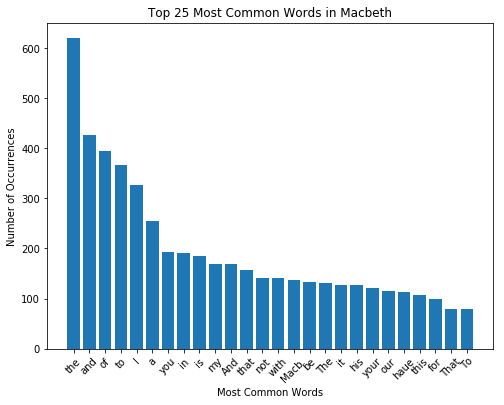

In [6]:
# Split the transcript into words
word_list = macbeth.split()

# Create a dictionary
word_dict = {}

# Iterate through the text of Macbeth
# Update word counts
for word in word_list:
#    word_count = word_list.count(word)
    word_dict[word] = word_dict.get(word, 0) + 1

# Make list of top 25 most common words
# (Note the slice [1:26] rather than [0:25].
# This is because the most common "word" was whitespace.)
top_25_words = sorted(word_dict, key=word_dict.get, reverse=True)[:26]

# Make list of counts for the top 25 words
top_word_counts = []
for top_word in top_25_words:
    top_word_counts.append(word_dict[top_word])

# Import matplotlib and enable inline plot display
import matplotlib.pyplot as plt

% matplotlib inline

# Create Bar Graph
plt.figure(figsize = (8, 6))
plt.bar(top_25_words, top_word_counts)

# Include descriptive titles and labels
plt.title('Top 25 Most Common Words in Macbeth')
plt.xlabel('Most Common Words')
plt.xticks(rotation=45)
plt.ylabel('Number of Occurrences')
plt.show()

For extra practice, I'm going to re-calculate the top 25 words in Macbeth minus a standard list of English stopwords (the, a, in, etc.) from the Natural Language Tool Kit (NLTK).

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jennykreiger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


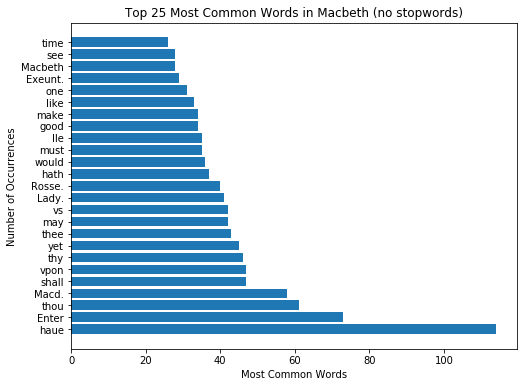

In [9]:
# Import nltk and English stopwords list
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = list(set(stopwords.words('english')))

# Add alternate versions of stopwords to list
stopwords_caps = list(map(lambda word: word.capitalize(), stopwords))
stopwords_lower = list(map(lambda word: word.lower(), stopwords))
stopwords_upper = list(map(lambda word: word.upper(), stopwords))

stopwords = stopwords + stopwords_caps + stopwords_lower + stopwords_upper

# Recreate the word dictionary, this time without the stopwords
word_dict_no_stopwords = {}

for word in word_dict.keys():
    if word not in stopwords:
        word_dict_no_stopwords[word] = word_dict[word]

# Make list of top 25 most common words minus stopwords
top_25_words_no_stopwords = sorted(word_dict_no_stopwords, 
                                   key=word_dict_no_stopwords.get, 
                                   reverse=True)[1:26]

# Make list of counts for the top 25 words
top_word_counts_no_stopwords = []
for top_word in top_25_words_no_stopwords:
    top_word_counts_no_stopwords.append(word_dict_no_stopwords[top_word])

# Create Bar Graph
plt.figure(figsize = (8, 6))
plt.barh(top_25_words_no_stopwords, top_word_counts_no_stopwords)

# Include descriptive titles and labels
plt.title('Top 25 Most Common Words in Macbeth (no stopwords)')
plt.xlabel('Most Common Words')
plt.ylabel('Number of Occurrences')
plt.show()

An interesting thing to note is that our list of stopwords from NLTK does not include many older versions of modern words (e.g., thou, thee, hath, etc.). For a deeper analysis, we could make a list of stopwords better attuned to Shakespeare's diction and to the peculiar spellings (e.g., "vpon" for "upon") of the edition we're analyzing.

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!